In [1]:
import os
from google.cloud import vision
import cv2
from matplotlib import pyplot as plt
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="client_secrets.json"

In [2]:
client = vision.ImageAnnotatorClient()

In [18]:
import io

#img = 'C:\\Users\\Dime\\Desktop\\Insight project\\compostmenot\\Notebooks\\optimization_images\\002_Pizza_Box.jpg'
img = "battery.jpg"
with io.open(img,'rb') as image_file:
        content = image_file.read()


In [19]:
image = vision.types.Image(content=content)

In [24]:
objects = client.object_localization(
        image=image).localized_object_annotations
objectList = []

print('Number of objects found: {}'.format(len(objects)))
for object_ in objects:
    print('\n{} (confidence: {})'.format(object_.name, object_.score))
    objectList.append(object_.name)
    print('Normalized bounding polygon vertices: ')
    for vertex in object_.bounding_poly.normalized_vertices:
        print(' - ({}, {})'.format(vertex.x, vertex.y))

Number of objects found: 1

Battery (confidence: 0.8040310144424438)
Normalized bounding polygon vertices: 
 - (0.41603267192840576, 0.23172056674957275)
 - (0.5778030753135681, 0.23172056674957275)
 - (0.5778030753135681, 0.7900505065917969)
 - (0.41603267192840576, 0.7900505065917969)


In [25]:
objectList

['Battery']

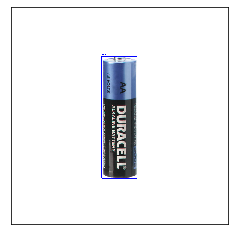

In [22]:
#img = 'dog.jpg'
img = cv2.imread(img)
height = img.shape[0]
width = img.shape[1]
color = (0, 0, 255) 
thickness = 2

for object_ in objects:
    objectname = object_.name
    count = 0
    for vertex in object_.bounding_poly.normalized_vertices:
        if(count == 0):
            startX = int(width*vertex.x)
            startY = int(height*vertex.y)
        if(count == 2):
            endX = int(width*vertex.x)
            endY = int(height*vertex.y)
        count += 1
    img = cv2.rectangle(img, (startX, startY), (endX, endY), color, thickness) 
    cv2.putText(img, objectname, (startX, (startY-10)), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255), 1)

plt.imshow(img)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

cv2.imshow('sample image',img)
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows()